# Simple box measured in dynamic conditions

<img src='images/dynamic_box1.png' width=600 />

A small box is heated by a 15W lamp, and the indoor temperature is monitored by sensors (EmonTH and Data logger), along with the external temperature. By analysing these measurements, we wish to estimate the thermal properties of the box: resistance and capacity.
One of the walls of the box is interchangeable: it can be replaced by concrete, wood, insulation, brick… 5 tests have been run with different wall compositions:
-	concrete
-	brick
-	wood
-	insulated concrete
-	insulated wood

During each test, the lamp is turned on and off a few times, and kept on overnight. The figure below shows the indoor temperature and heating power recorded during one of the tests.

<img src='images/dynamic_box2.png' width=600 />

All 5 tests are available in the file: `data/dynamic_data_1.xlsx`

### Question

Find which wall composition (concrete, wood, etc.) was used in each test of the file.


### Method

<img src='images/r1c1.png' width=200 />

Fit a simple RC model (shown above) on each of the 5 tests, to estimate 5 different values of the resistance R and the capacity C. You can then classify these values and relate them to possible materials. For each of the 5 tests, this is how you can estimate R and C

- 	Pick an initial value for R and C, and predict the indoor temperature $T$ with the formula (where $T_a$ is the ambient temperature and $q$ is the heating power):

$$ C\dfrac{\partial T}{\partial t} = \dfrac{1}{R} (T_a - T) + q $$

- Calculate the sum of squared residuals between this prediction and the measured value of $T$:

$$ r^2 = \sum \left( T_{calculated} - T_{measured} \right)^2 $$

- Find the values of $R$ and $C$ that give the lowest value for $r^2$.

### Example

Below is a python script that solves the exercise. You can solve it with Excel as well, but the curve fitting algorithms are more efficient here.

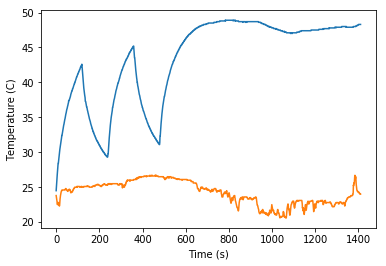

R: 1.75 K/W
C: 2791.89 J/K


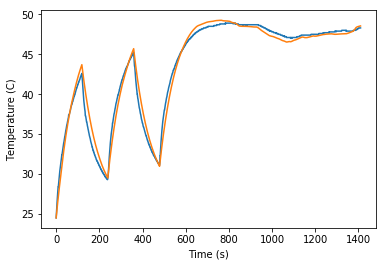

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from file
data = pd.ExcelFile('data/dynamic_data_1.xlsx').parse('Test 2')
Ti = data['Ti [°C]'].fillna(method='bfill')
Ta = data['Te [°C]'].fillna(method='bfill')
P = data['P [W]'].fillna(method='bfill')
t = data['DD/MM/AAAA hh:mm']

delta_t = 60
inputs = np.vstack((Ta, P))

# First plot of the data to make sure that nothing is missing
plt.figure()
plt.plot(Ti)
plt.plot(Ta)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()

# Function that will calculate the indoor temperature for a given value of R and C
def Ti_calc(inputs, R, C):
    y = np.zeros_like(Ti)
    y[0] = Ti[0]
    for t in range(1,len(Ti)):
        y[t] = 1/(C/delta_t+1/R) * (C/delta_t*y[t-1] + 1/R*Ta[t] + P[t])
    return y

#%% Optimisation

import scipy.optimize as so
# The curve_fit function will find the optimal value for the parameters R and C
p_opt, p_cov = so.curve_fit(f=Ti_calc, xdata=inputs, ydata=Ti, p0=(1.22, 3000))
R_opt = p_opt[0]
C_opt = p_opt[1]

print('R: %.2f K/W' % R_opt)
print('C: %.2f J/K' % C_opt)

#%% Plot the results to see if the calculated temperature fits well with measurements

plt.figure()
plt.plot(Ti)
plt.plot(Ti_calc(inputs, R_opt, C_opt))
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.show()